In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import tensorflow
import sciann as sn

In [2]:
x = sn.Variable('x')
y = sn.Variable('y')
t = sn.Variable('t')

u = sn.Functional('u', [x, y, t], 8*[20], 'tanh')
v = sn.Functional('v', [x, y, t], 8*[20], 'tanh')

In [3]:
nu = (0.01/np.pi)

In [4]:
u_t = sn.diff(u, t)
u_x = sn.diff(u, x)
u_y = sn.diff(u, y)
u_xx = sn.diff(u, x, order=2)
u_yy = sn.diff(u, y, order=2)

v_t = sn.diff(v, t)
v_x = sn.diff(v, x)
v_y = sn.diff(v, y)
v_xx = sn.diff(v, x, order=2)
v_yy = sn.diff(v, y, order=2)

In [5]:
L1 = u_t + u*u_x + v*u_y - nu*(u_xx + u_yy)
L2 = v_t + u*v_x + v*v_y - nu*(v_xx + v_yy)

In [6]:
from numpy import pi
from sciann.utils.math import diff, sign, sin

In [7]:
# Data : 
x_data, y_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100),
    np.linspace(0, 1, 100)
)

In [31]:
TOL = 0.001

# Initial conditions for u and v :
# u(t=0,x,y) = sin(pi*x)*sin(pi*y)
# v(t=0,x,y) = sin(pi*x)*sin(pi*y)
C1 = (1-sign(t - TOL)) * (u - sin(pi*x)*sin(pi*y))
C2 = (1-sign(t - TOL)) * (v - sin(pi*x)*sin(pi*y))

# Initial conditions for x :
C3 = (1-sign(x - (-1+TOL))) * (u) # u(t,x=-1,y) = 0
C4 = (1+sign(x - ( 1-TOL))) * (u) # u(t,x=1,y) = 0

C5 = (1-sign(x - (-1+TOL))) * (v) # v(t,x=-1,y) = 0
C6 = (1+sign(x - ( 1-TOL))) * (v) # v(t,x=1,y) = 0

# Initial conditions for y :
C7 = (1-sign(y - (-1+TOL))) * (u) # u(t,x,y=-1) = 0
C8 = (1+sign(y - ( 1-TOL))) * (u) # u(t,x,y=1) = 0

C9 = (1-sign(y - (-1+TOL))) * (v) # v(t,x,y=-1) = 0
C10 = (1+sign(y - ( 1-TOL))) * (v) # v(t,x,y=1) = 0

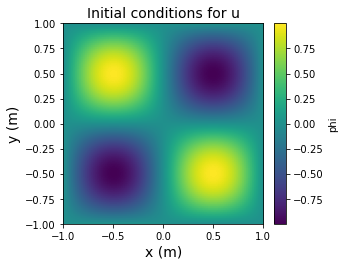

In [32]:
# Initial conditions :

plt.figure(figsize=(4,4))

ax = plt.gca()
im = ax.imshow(np.sin(x_data[:,:,0]*np.pi)*np.sin(y_data[:,:,0]*np.pi),extent=[-1, 1, -1, 1])

plt.xlabel('x (m)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('y (m)', fontsize=14)
plt.yticks(fontsize=10)

plt.title('Initial conditions for u', fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('phi',size=10)

In [34]:
m = sn.SciModel([x, y, t], [L1, L2, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10],"mse", "Adam")

In [35]:
h = m.train([x_data, y_data, t_data], 12*['zero'], learning_rate=0.002,batch_size=1024, epochs=10, verbose=1)

Train on 1000000 samples
Epoch 1/10
1000000/1000000 [==============================] - 73s 73us/sample - loss: 0.0155 - sub_loss: 7.5425e-04 - sub_2_loss: 5.3047e-05 - mul_26_loss: 0.0048 - mul_30_loss: 0.0095 - mul_31_loss: 7.6897e-05 - mul_32_loss: 1.0642e-04 - mul_33_loss: 1.0035e-06 - mul_34_loss: 1.1239e-04 - mul_35_loss: 3.8680e-05 - mul_36_loss: 6.7247e-05 - mul_37_loss: 8.1430e-07 - mul_38_loss: 6.3041e-07
Epoch 2/10
1000000/1000000 [==============================] - 72s 72us/sample - loss: 0.0129 - sub_loss: 7.1969e-04 - sub_2_loss: 6.4084e-05 - mul_26_loss: 0.0024 - mul_30_loss: 0.0095 - mul_31_loss: 6.6684e-05 - mul_32_loss: 6.4047e-05 - mul_33_loss: 8.3895e-07 - mul_34_loss: 1.0821e-04 - mul_35_loss: 2.4842e-05 - mul_36_loss: 2.7586e-05 - mul_37_loss: 7.3603e-07 - mul_38_loss: 4.3855e-07
Epoch 3/10
1000000/1000000 [==============================] - 75s 75us/sample - loss: 0.0133 - sub_loss: 5.8400e-04 - sub_2_loss: 6.8750e-05 - mul_26_loss: 0.0029 - mul_30_loss: 0.0095 - mu

In [37]:
x_test, y_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200),
    np.linspace(-1, 1, 200),
    np.linspace(0, 1, 100)
)
u_pred = u.eval(m, [x_test, y_test, t_test])
v_pred = v.eval(m, [x_test, y_test, t_test])

Text(0.5, 1.0, 'Initial conditions for v')

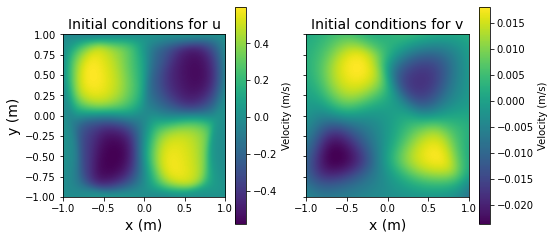

In [58]:
fig, ax = plt.subplots(1,2,figsize=(8,4),sharey=True)

cbar = plt.colorbar(ax[0].imshow(u_pred[:,:,0],extent=[-1, 1, -1, 1]),ax=ax[0])
cbar.set_label('Velocity (m/s)')
ax[0].set_xlabel('x (m)', fontsize=14)
ax[0].set_ylabel('y (m)', fontsize=14)

ax[0].tick_params(labelsize=10)
ax[0].set_title('Initial conditions for u', fontsize=14)

cbar = plt.colorbar(ax[1].imshow(v_pred[:,:,0],extent=[-1, 1, -1, 1]),ax=ax[1])
cbar.set_label('Velocity (m/s)')
ax[1].set_xlabel('x (m)', fontsize=14)

ax[1].tick_params(labelsize=10)
ax[1].set_title('Initial conditions for v', fontsize=14)